| |<font size="5">Classification  _  تصنيف البيانات </font>|
|-:|-:|
|<img src="https://e7.pngegg.com/pngimages/372/528/png-clipart-four-assorted-color-mushrooms-mushroom-fungus-mushroom-photography-grass-thumbnail.png" width=250></img>||
||<font size="4"> تحميل البيانات  </font>| 
||<font size="4">  معالجة البيانات الرقمية</font>| 
||<font size="4">XGBClassifier تدريب البيانات </font>|
||<font size="4"> تقويم أداء الخوارزميات </font>| 
||<font size="4"> تحديد الخصائص الأكثر أهمية </font>|

- الفِطريات كائنات حية واسعة الانتشار، تضم ما يزيد عن (100) ألف نوع لذلك وضعت ضمن مملكة مستقلة بحد ذاتها تسمى مملكة الفطريات  

Mushroom Classification Dataset - All Categorical Features


Input Features: 'cap-shape', 'cap-surface', 'cap-color', 'bruises','odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color','stalk-shape', 'stalk-root', 'stalk-surface-above-ring','stalk-surface-below-ring', 'stalk-color-above-ring','stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'

Target Feature:
'class_edible'

Objective: Predict if a mushroom is edible or inedible

In [1]:
pwd

'/content'

In [2]:
cd  drive/My\ Drive/ML-Course

/content/drive/My Drive/ML-Course


In [3]:
ls ./data

Advertising.csv                       HousePrice2.csv
bst_features.csv                      HousePrice3.csv
bst_target.csv                        HousePrice_4.csv
california_housing_test.csv           housePrice_5.csv
california_housing_train.csv          HousePrice_5.csv
churn_1.csv                           HousePrice.csv
churn_features.csv                    kidney_disease.csv
churn_target.csv                      mushroom_data_all.csv
churn.txt                             pandas_1.csv
data_1.csv                            pandas_2.csv
data_cleaned.csv                      pandas_3.csv
df_merged.cvs                         sales.csv
features_kept1.csv                    sales-funnel.xlsx
features_selected.txt                 wdbc.data
Google_Stock_Price_Test.textClipping  weather.csv
HousePrice1.csv


In [5]:
import numpy as np
import pandas as pd


In [6]:

#  https://archive.ics.uci.edu/ml/datasets/mushroom    يمكن تحميل البيانات من الموقع التالي 

df = pd.read_csv('./data/mushroom_data_all.csv')


In [7]:
df.head(3)

,class_edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m


In [8]:
df.class_edible.value_counts()

e    4208
p    3916
Name: class_edible, dtype: int64

In [9]:
pd.get_dummies(df ).head(3)

,class_edible_e,class_edible_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,...,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [ ]:
# p :  Poisonous
# e:  Edidable 

In [10]:
df.keys()

Index(['class_edible', 'cap-shape', 'cap-surface', 'cap-color', 'bruises',
       'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class_edible              8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [12]:
for key in df.keys():
    print(key, df[key].unique())

class_edible ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [18]:
#    تصنيف  +  القيم الناقصة

for col in df.columns:
      print(f" {col:-<50} :   {df[col].unique()} & Mising Values |({df[col].isna().sum()/df.shape[0]:.3}) " )

 class_edible-------------------------------------- :   ['p' 'e'] & Mising Values |(0.0) 
 cap-shape----------------------------------------- :   ['x' 'b' 's' 'f' 'k' 'c'] & Mising Values |(0.0) 
 cap-surface--------------------------------------- :   ['s' 'y' 'f' 'g'] & Mising Values |(0.0) 
 cap-color----------------------------------------- :   ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r'] & Mising Values |(0.0) 
 bruises------------------------------------------- :   ['t' 'f'] & Mising Values |(0.0) 
 odor---------------------------------------------- :   ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm'] & Mising Values |(0.0) 
 gill-attachment----------------------------------- :   ['f' 'a'] & Mising Values |(0.0) 
 gill-spacing-------------------------------------- :   ['c' 'w'] & Mising Values |(0.0) 
 gill-size----------------------------------------- :   ['n' 'b'] & Mising Values |(0.0) 
 gill-color---------------------------------------- :   ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o'] 

In [ ]:
#  وجب التخلص من البيانات التي لا تتغير او تلك التي تتغير بمقدار بسيط 
df["veil-type"].unique()

In [ ]:
df.drop("veil-type", axis=1,  inplace=True)

In [ ]:
#   يلاحظ تواجد عديد الخصائص الثنائية
# والتي وجب ترميزها دون السقوط في التكرار

In [19]:
df_enc=pd.get_dummies(df, drop_first=True )
df_enc.head(3)

,class_edible_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,...,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT9GPc3te-hV52pZv1105UrkoNttMfzawJwFg&usqp=CAU" width=100></img>

In [20]:
# تحديد الخصائص والهدف
X=df_enc.drop("class_edible_p", axis=1)
y=df_enc.class_edible_p

![](https://i.ibb.co/QChD6Y4/Train-test-1.jpg)

In [21]:
# تقسيم البيانات :  تدريب &  اختبار
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y  ,test_size=.33, random_state=42)

In [22]:
# حجم البيانات 
X_train.shape, X_test.shape

((5443, 95), (2681, 95))

<image src="https://static.thenounproject.com/png/2010152-200.png" width=10%></img>

In [24]:
import xgboost as xgb
classifier = xgb.XGBClassifier (objective='binary:logistic')

In [25]:
#xgboost  معايير  خوارزمية    
classifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

$\Large logLoss=\frac{-1}{N}  \sum [ y_i \log(p_i) + (1-y_i)\log(1-p_i)]$
- log Loss function (the residuals in Logistic Regression)

In [27]:
# تدريب البيانات
# n_estimators=100   تفيد بعدد المرات التي يتم معالجة البيانات من طرف الخوارزمية
classifier.fit(X_train,
               y_train,
               eval_set = [(X_train, y_train), (X_test, y_test)], 
               eval_metric=['logloss'])

[0]	validation_0-logloss:0.603496	validation_1-logloss:0.604066
[1]	validation_0-logloss:0.530049	validation_1-logloss:0.531125
[2]	validation_0-logloss:0.468799	validation_1-logloss:0.470529
[3]	validation_0-logloss:0.418419	validation_1-logloss:0.420846
[4]	validation_0-logloss:0.37378	validation_1-logloss:0.376689
[5]	validation_0-logloss:0.336431	validation_1-logloss:0.339481
[6]	validation_0-logloss:0.302854	validation_1-logloss:0.306222
[7]	validation_0-logloss:0.273997	validation_1-logloss:0.277693
[8]	validation_0-logloss:0.248764	validation_1-logloss:0.252469
[9]	validation_0-logloss:0.225651	validation_1-logloss:0.229271
[10]	validation_0-logloss:0.205585	validation_1-logloss:0.209409
[11]	validation_0-logloss:0.187862	validation_1-logloss:0.191711
[12]	validation_0-logloss:0.171888	validation_1-logloss:0.175887
[13]	validation_0-logloss:0.157613	validation_1-logloss:0.161377
[14]	validation_0-logloss:0.144824	validation_1-logloss:0.148637
[15]	validation_0-logloss:0.1332	val

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

![](https://i.ibb.co/wQC2qF6/ruler.png)

In [28]:
#  جدول  معالجة البيانات
eval_result = classifier.evals_result()

In [26]:
#x تحديد مدى البيانات على محور  
training_rounds = range(len(eval_result['validation_0']['logloss']))
training_rounds


range(0, 100)

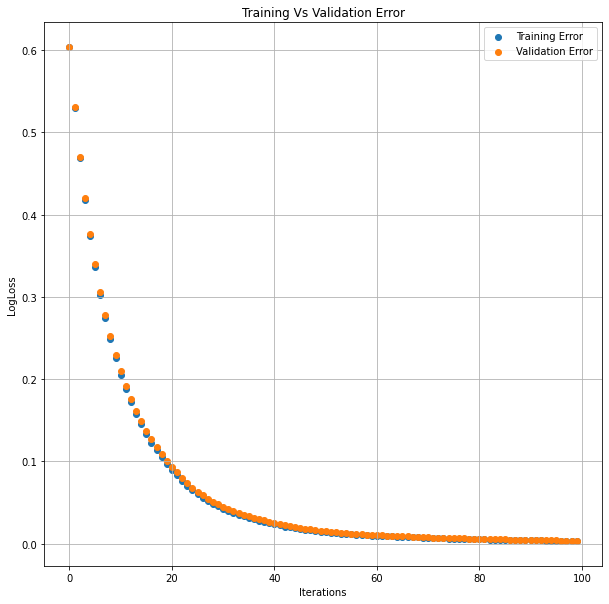

In [27]:
# تخطيط  التدرج في معالجة بيانات التدريب والاختبار
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(x=training_rounds,y=eval_result['validation_0']['logloss'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['logloss'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('LogLoss')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

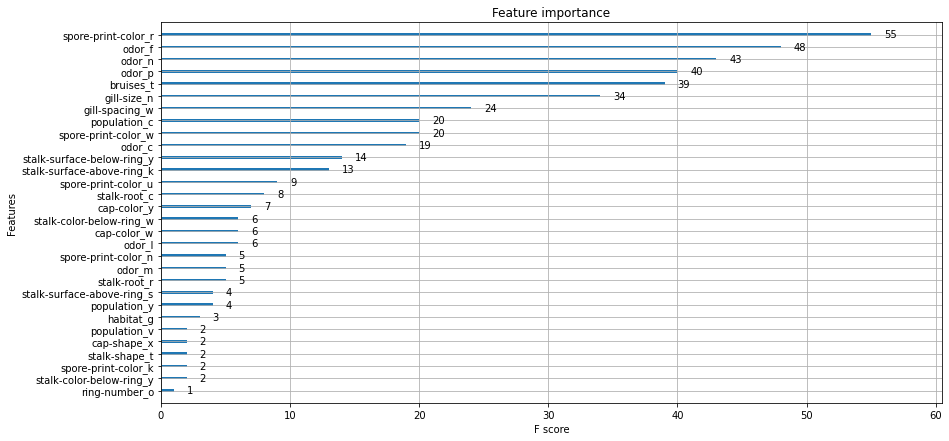

In [28]:
# تحديد اهم خصائص قاعدة البيانات الاكثر تأثيرا في قيمة الهدف والذي يتمثل في التعرف على نوعية الفطر
plt.rcParams["figure.figsize"] = (14, 7)
xgb.plot_importance(classifier)
plt.show()

In [29]:

# التنبؤ
y_pred=classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


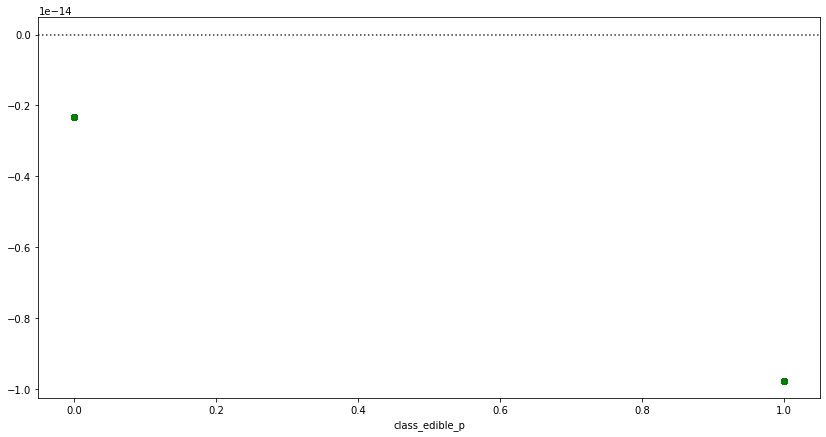

In [30]:
# Residuals    عرض تخطيط تشتت البواقي
import seaborn as sns

# Generate a green residual plot of the regression between 'hp' and 'mpg'
_=sns.residplot(y_test,y_pred, color='green')

In [31]:
# عرض جدول القيم التي تم التنبؤ بها ومقارنتها بتلك التي بالجدول الأصلي 
pd.DataFrame({"Predicted":y_pred, "Actual Value": y_test}).sample(6, random_state=10)

,Predicted,Actual Value
7265,1,1
1902,0,0
1480,0,0
2648,0,0
4333,1,1
245,0,0


In [33]:
! pip install  scikit-plot

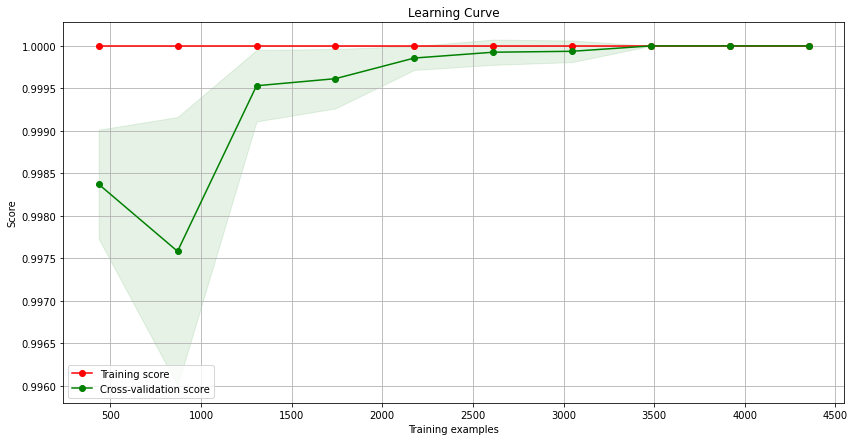

In [41]:
# تخطيط التعلّم 
import scikitplot as skplt
skplt.estimators.plot_learning_curve(classifier, 
                                     X_train, y_train, 
                                     scoring="roc_auc",  
                                     train_sizes=np.linspace(.1, 1.0, 10) ,  
                                     ) # neg_mean_absolute_error"

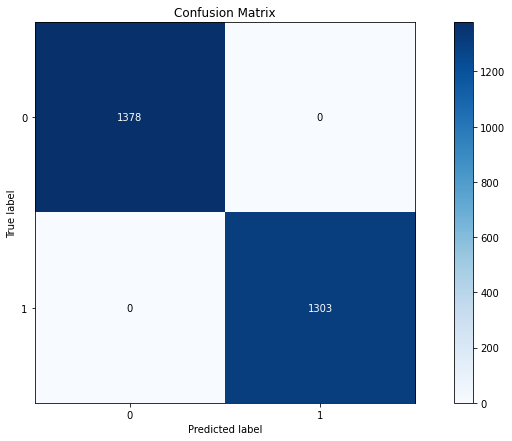

In [42]:
#  Confusion Matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred) #, normalize=True)

In [43]:
y_probas = classifier.predict_proba(X_test)
y_probas[:3]

array([[9.9971551e-01, 2.8450057e-04],
       [2.1131635e-03, 9.9788684e-01],
       [9.7155571e-05, 9.9990284e-01]], dtype=float32)

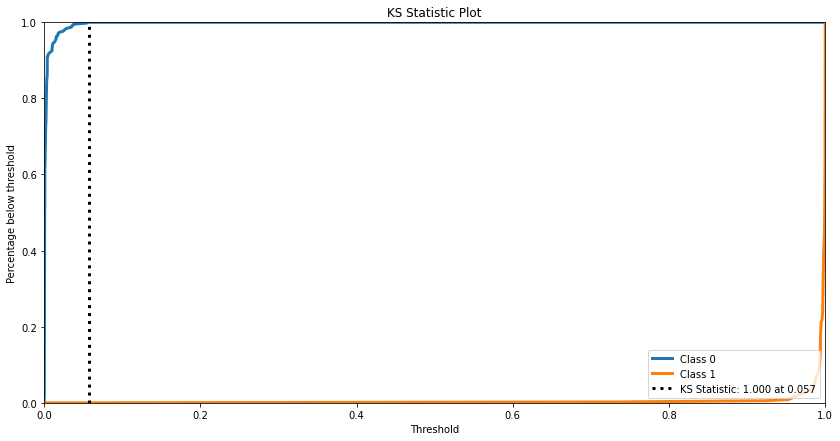

In [44]:
# الحد الفاصل الذي يحدد مخرجات النتبؤ
# ثبات النموذج
skplt.metrics.plot_ks_statistic(y_test, y_probas)